# Chapter 1 - Analyzing Variability: Descriptive Statistics

*Chapter Objective: Present methods for analyzing variability* 

## 1.1 Random Phenomena and the Structure of Observations

Below we import a table containing measurements of piston cycle times (one measurement of piston performance).

In [1]:
import mistat 
data = mistat.load_data('CYCLT')
print(data.head())
print()
print(data.info())

0    1.008
1    1.098
2    1.120
3    0.423
4    1.021
Name: CYCLT, dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: CYCLT
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes
None


A variable whose value cannot be predicted with certainty is a **random variable**

Let's simulate a coin toss experiment

In [2]:
from scipy.stats import binom
import numpy as np

#arg1 = number of trials, arg2 =  probability of success, kwarg["size"] = number of observations
X = binom.rvs(1, 0.5, size=50)

print(X)

[1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 0 1]


In [3]:
import matplotlib.pyplot as plt

In [4]:
steelrod = mistat.load_data('STEELROD')

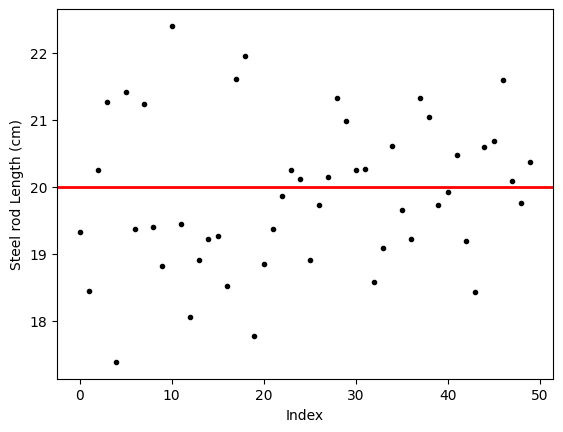

In [5]:
# create a scatterplot
ax = steelrod.plot(y='STEELROD', style='.', color='black')
ax.set_xlabel('Index') # set the x axis title
ax.set_ylabel('Steel rod Length (cm)') # set the y axis title
ax.axhline(y=20, color= 'red', linewidth=2,)
plt.show()

Above, the target length is 20. Here, there are no systematic variations from the target

A random sequence can consist of values where each value is composed of a **fixed** component and a **random** component. A fixed pattern is called a **deterministic** pattern.

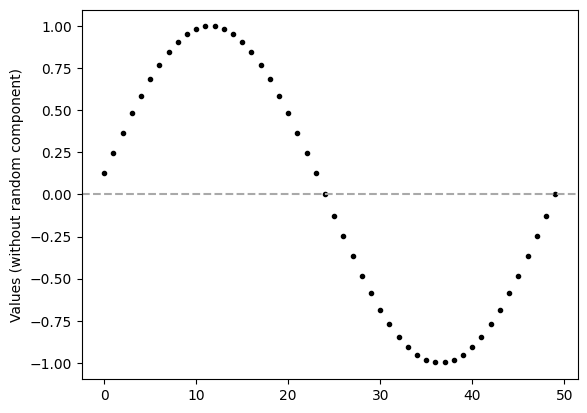

In [6]:
import math
import pandas as pd
from scipy.stats import norm
# create a list of 50 values forming a sine curve
x = [math.sin(x * 2 * math.pi / 50) for x in range(1, 51)]
# Add a random normal with mean 0 and standard deviation 0.05
# x = [xi + norm.rvs(loc=0, scale=0.05) for xi in x]
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values (without random component)')
ax.axhline(y=0, linestyle='--', color='darkgray')
plt.show()

$$x_i = \sin\left(\frac{{2 \cdot \pi \cdot i}}{{50}}\right)$$

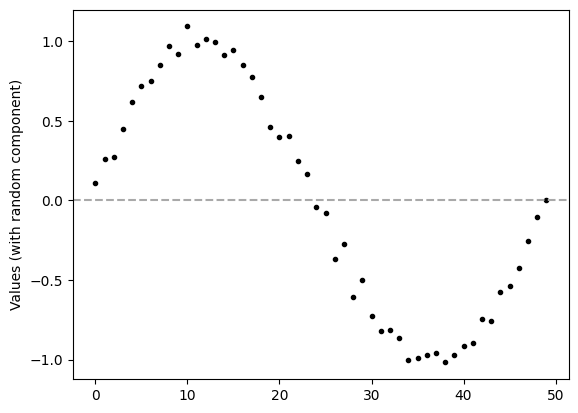

In [7]:
x = [xi + norm.rvs(loc=0, scale=0.05) for xi in x]
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values (with random component)')
ax.axhline(y=0, linestyle='--', color='darkgray')
plt.show()

Although we can't exactly predict values in the second plot, we **expect** they will be close to the deterministic pattern seen in the prior plot.

## 1.2 Accuracy and Precision of Measurements

An instrument is **accurate** is the average value of multiple measurements of the same object is equal to the true value. Otherwise it is **inaccurate**. 

**Precision** is related to the dispersion of the measurements around their average. When dispersion is small, the precision is high, and vise versa.

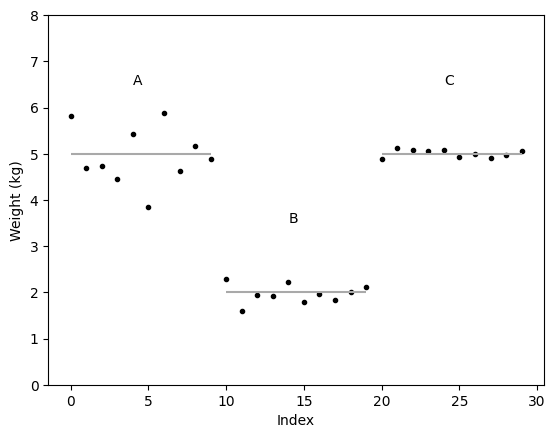

In [8]:
np.random.seed(seed=1)
x = np.concatenate([5 + norm.rvs(loc=0, scale=0.5, size=10),
2 + norm.rvs(loc=0, scale=0.2, size=10),
5 + norm.rvs(loc=0, scale=0.1, size=10)])
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values')
ax.set_xlabel('Index')
ax.set_ylabel('Weight (kg)')
ax.hlines(y=5, xmin=0, xmax=9, color='darkgray')
ax.hlines(y=2, xmin=10, xmax=19, color='darkgray')
ax.hlines(y=5, xmin=20, xmax=29, color='darkgray')
ax.text(4, 6.5, 'A')
ax.text(14, 3.5, 'B')
ax.text(24, 6.5, 'C')
ax.set_ylim(0, 8)
plt.show()

Above is the weighing  measurements of an object with a true wight of 5 kg. Assessing the measurements of each instrument A, B, C, we can see that: 

Instrument|Accuracy|Dispersion(Precision)
---|---|--- 
A|high|high(low)
B|low|low(high)
C|high|low(high)

NOTE: Given high accuracy, an instrument with high precision can take greater faith in the accuracy of any one of it's given observations.

## 1.3 The Population and the Sample

A **statistical population** is a collection of units that have a certain common attribute. Examples include:
- the set of all citizens in the US in June 2023 (finite and real population)
- all widgets that will ever be made by some process (infinite and hypothetical)

A **sample** is a subset of the elements of a given population, often coming in the form of a **random sample** from the population.

## 1.4 Descriptive Analysis of Sample Values

One way of describing a distribution of sample values is to construct a **frequency distribution** of the sample values (more useful for large samples). There are two types of frequency distributions based on their variable types
: 
- discrete
- continous

### 1.4.1 Frequency Distributiosn of Discrete Random Variables

NOTE: For a more detailed breakdown of the formal definition of a frequency distribution, see pages 9 through 10.

A US manufacturer of hybrid microelectronic components purchases ceramic plates from a large Japanese supplier. The plates are visually inspected before screen printing. Blemishes will affect the final product’s electrical performance and overall yield. In order to prepare a report for the Japanese supplier, the US manufacturer decided to characterize the variability in the number of blemishes found on the ceramic plates.

In [9]:
blemishes = mistat.load_data('BLEMISHES')
blemishes.head(10)

,plateID,count
0,1,0
1,2,2
2,3,0
3,4,0
4,5,1
5,6,3
6,7,0
7,8,3
8,9,1
9,10,1


In [10]:
# we can access individual elements in the table with `.iloc[i,j]` 
# where i is the row and j is the column
print(blemishes.iloc[0, 0])
print(blemishes.iloc[1, 0])
print(blemishes.iloc[2, 1])

1
2
0


In [11]:
# extract column by name
blemishes['count'].head(5)

0    0
1    2
2    0
3    0
4    1
Name: count, dtype: int64

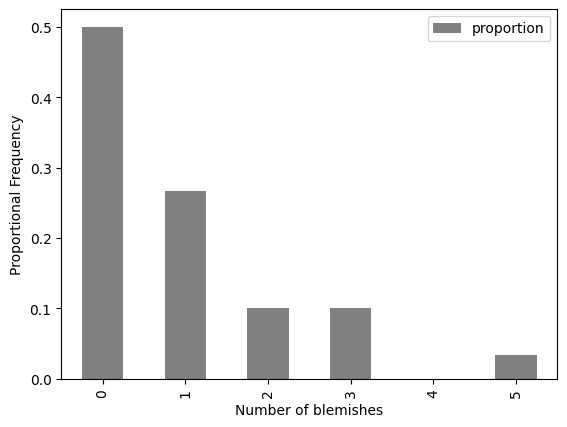

In [12]:
# use value_counts with normalize to get relative frequencies
#NOTE: This creates a new column called `proportions` which stores the relative frequencies
X = pd.DataFrame(blemishes['count'].value_counts(normalize=True)) 
X.loc[4, 'proportion'] = 0 # there are no samples with 4 blemishes add a row
X = X.sort_index() # sort by number of blemishes
ax = X['proportion'].plot.bar(color='grey', legend=True)
ax.set_xlabel('Number of blemishes')
ax.set_ylabel('Proportional Frequency')
plt.show()

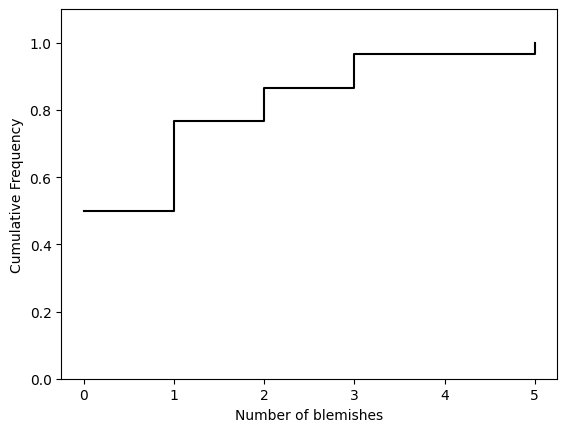

In [13]:
X['Number'] = X.index # add number of blemishes as column
X['Cumulative Frequency'] = X['proportion'].cumsum()
ax = X.plot.line(x='Number', y='Cumulative Frequency', color='black',
drawstyle='steps-post', legend=False)
ax.set_xlabel('Number of blemishes')
ax.set_ylabel('Cumulative Frequency')
ax.set_ylim(0, 1.1)
plt.show()

### 1.4.2 Frequency Distributions of Continuous Random Variables

In order to construct a frequency distribution for continous values, we must consider the following
two questions:
- (i) How many subintervals should we choose?
- (ii) How large should the width of the subintervals be?

Subintervals are also called **bins, classes,** or **class intervals**

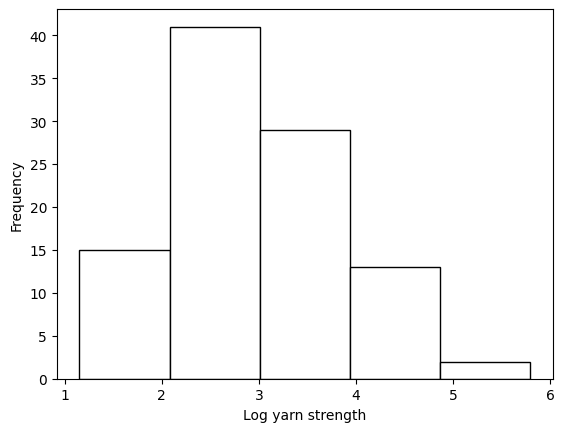

In [14]:
X = mistat.load_data('YARNSTRG')
ax = X.plot.hist(bins=5, color='white', edgecolor='black', legend=False)
ax.set_xlabel('Log yarn strength')
plt.show()

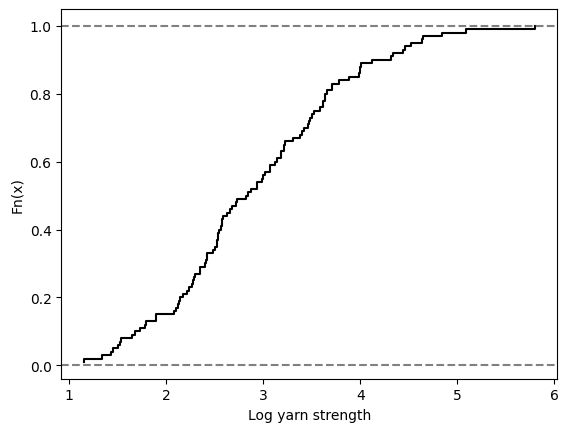

In [15]:
ecdf = pd.DataFrame({'Log yarn strength': X.sort_values(),
'Fn(x)': range(1, len(X) + 1)})
ecdf['Fn(x)'] = ecdf['Fn(x)'] / len(X)
ax = ecdf.plot(x='Log yarn strength', y='Fn(x)', color='black',
drawstyle='steps-post', legend=False)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Fn(x)')
plt.show()

### 1.4.3 Statistics of the Ordered Sample

**Ordered statistics** are thos characteristic values of a sample of observations that have been sorted from smallest to largest (ascending order). In general, **statistics** are computed from observations and are used to make inferences on characteristics of the population from where the sample was drawn.

Given a sample $X_1, X_2, ..., X_n$, the order statistics $X_{(1)}, X_{(2)}, ..., X_{(n)}$ of the sample are defined as the values sorted in increasing order. Thus:

$$X_{(1)} \leq X_{(2)} \leq ... \leq X_{(n)}$$

Where:
+ $X_{(1)}$ is the **sample minimum**
+ $X_{(n)}$ is the **sample maximum**
+ $R = X_{(n)} - X_{(1)}$ is the **sample range**
+ $M_e = X_{(m)}$ where $m = (n + 1) / 2$ is the **sample median**
- The first quartile (Q1) is the middle value in the first half of the dataset, that is,

  $$Q1 = \text{median}(X_1, ..., X_{\lfloor \frac{n}{2} \rfloor})$$

- The second quartile (Q2) or the median is the middle value of the dataset, that is,

  $$Q2 = \text{median}(X_1, ..., X_n)$$

- The third quartile (Q3) is the middle value in the second half of the dataset, that is,

  $$Q3 = \text{median}(X_{\lceil \frac{n}{2} \rceil}, ..., X_n)$$

In [16]:
cyclt = mistat.load_data('CYCLT')
print(cyclt.quantile(q=[0, 0.25, 0.5, 0.75, 1.0]))

0.00    0.1750
0.25    0.3050
0.50    0.5455
0.75    1.0690
1.00    1.1410
Name: CYCLT, dtype: float64


In [17]:
print(cyclt.describe())

count    50.000000
mean      0.652460
std       0.372971
min       0.175000
25%       0.305000
50%       0.545500
75%       1.069000
max       1.141000
Name: CYCLT, dtype: float64


To measure the spread of data about the mean, we typically use the **sample variance**, or it's square root, the **sample standard deviation**

### 1.4.3 Statistics of Location Dispersion

The **sample mean** is merely the average value of all observations in your data set

- When finding the mean of binary data, the mean gives you the proportion of the category defined as 1

In [21]:
X = mistat.load_data('YARNSTRG')
print(f'Skewness {X.skew():.4f}') # Computes the skewness with correctness for bias by default
print(f'Kurtosis {X.kurtosis():.4f}') # Computes the kurtosis with correctness for bias by default
from scipy.stats import skew, kurtosis
print(f'Skewness {skew(X, bias=False):.4f}') # Computes the skewness
print(f'Kurtosis {kurtosis(X, bias=False):.4f}') # Computes the kurtosis

Skewness 0.4164
Kurtosis -0.0080
Skewness 0.4164
Kurtosis -0.0080


**Skewness** and **kurtosis** give us information on the distribution of the observations/data set.

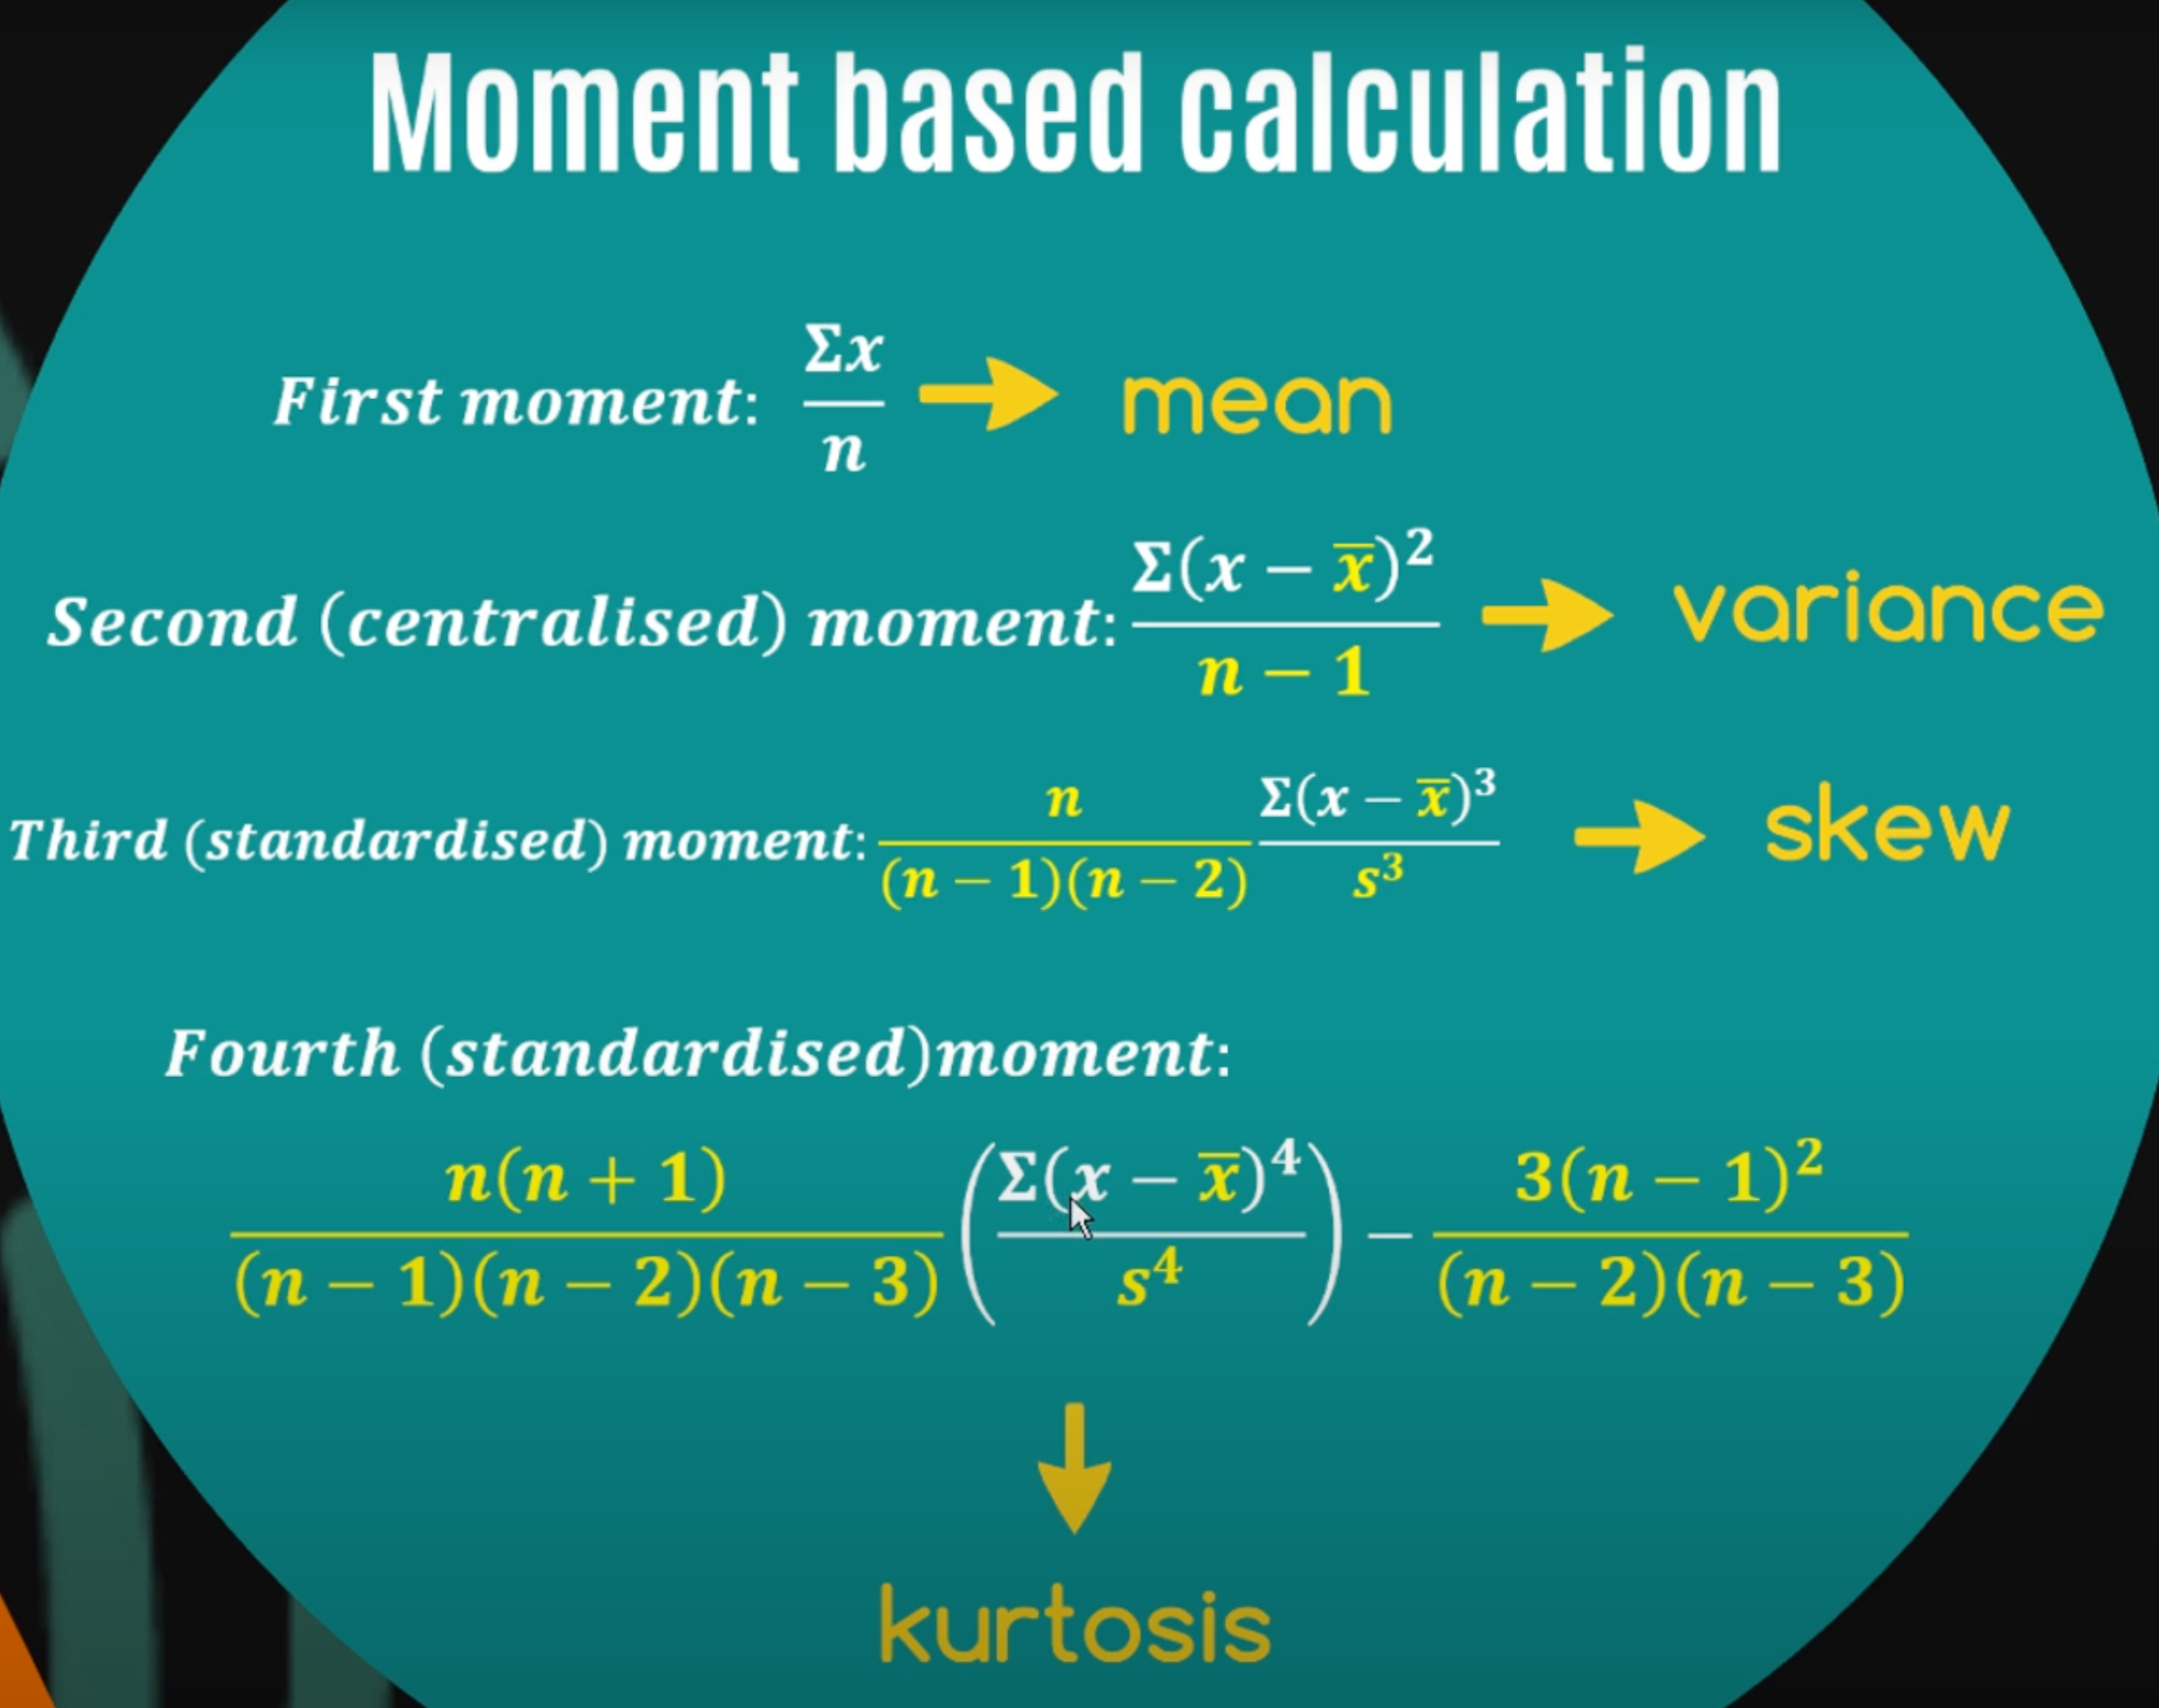

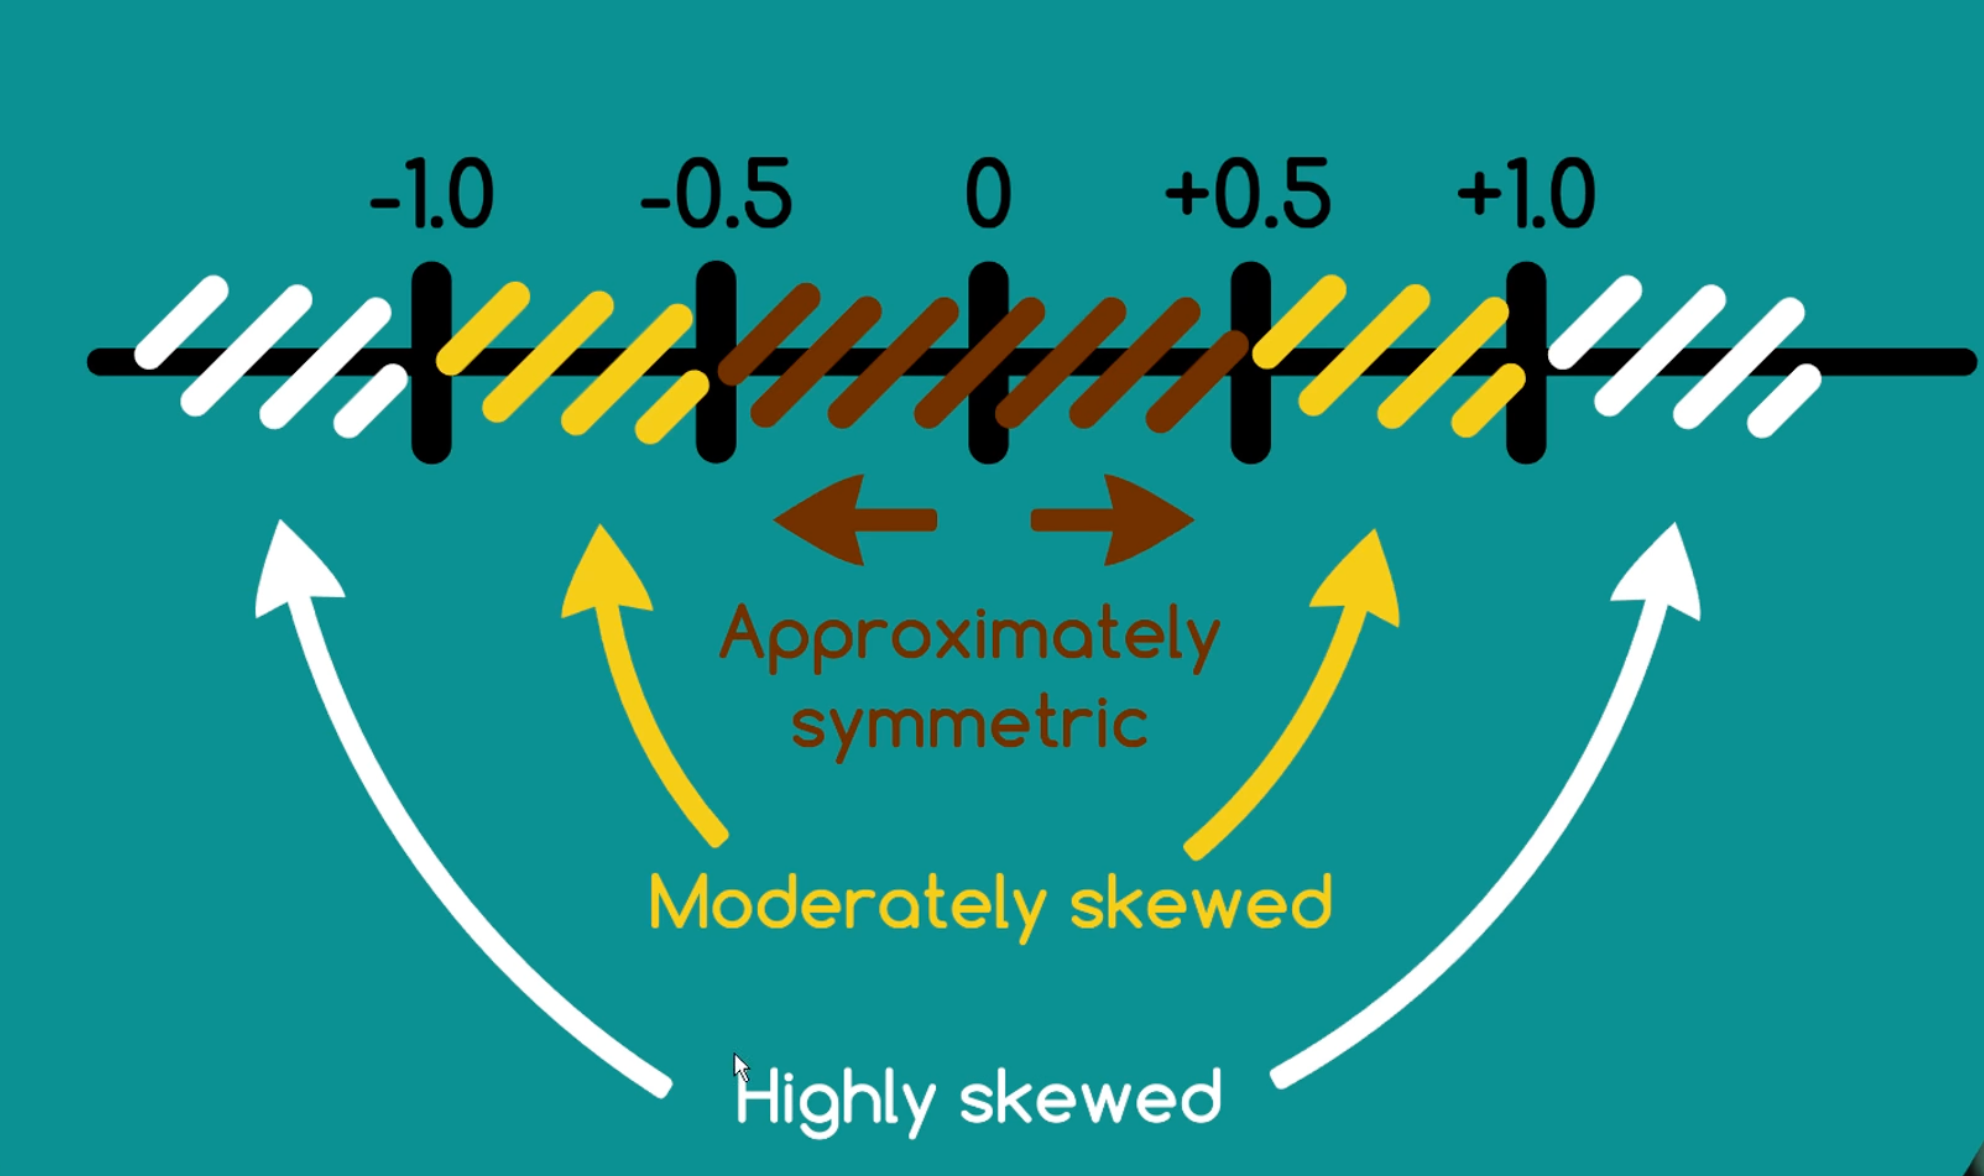

If the distribution is symmetric around the mean, then skewness = 0. If skewness > 0, the distribution is positively skewed (to the right). If skewness < 0, the distribution is negatively skewed (to the left). Distributions that are positively skewed have sample means that are greater that there medians, where negatively skewed distributions have the opposite. In symmetric distributions, they are equal.

The **geometric mean** is another measure, although it is better treated in this video:

[![Geometric Mean]({./mean_types.png})]({https://youtu.be/jXKYI7wyqp0?t=209} "Arithmetic Mean | Geometric Mean | Harmonic Mean")

## 1.5 Prediction Intervals

If the distribution of data is symmetric (skewness is equal to or near 0) and normal or bell-shaped (kurtosis is approx. 3 / excess kurtosis is approx. 0):
1. Approximately **68%** of all future measurements will lie within **one** standard deviation of the mean
2. Approximately **95%** of all future measurements will lie within **two** standard deviations of the mean
3. Approximately **99.7%** of all future measurements will lie within **three** standard deviations of the mean.

## 1.8 Exercises

In [27]:
#1.1 
import random
import collections
choices = random.choices(list(range(1,7)), k=50)
counter = collections.Counter(choices)
counter.most_common(6)

[(3, 11), (1, 10), (6, 9), (2, 8), (5, 8), (4, 4)]

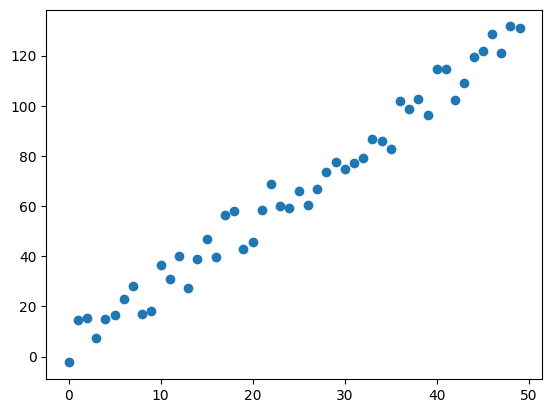

In [32]:
#1.2
random.seed(1)
x = list(range(50))
y = [5 + 2.5 * xi for xi in x]
y = [yi + random.uniform(-10, 10) for yi in y]
plt.plot(x,y,'o')
plt.show()